In [1]:
print('Boston Housing Improved')
#Feature Selection
#Elimination of outliers using IQR
#Estimation of performance for various models with various degree of polynomial function

Boston Housing Improved


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from IPython.display import display
%matplotlib inline

In [201]:
from sklearn.datasets import load_boston
bunchdata = load_boston()

dataset = pd.DataFrame(bunchdata.data,columns=bunchdata.feature_names)
target = bunchdata.target
print('Preview of data:')
display(dataset.head())
print('Preview of labels: ')
print(target[0:5])

Preview of data:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Preview of labels: 
[24.  21.6 34.7 33.4 36.2]


In [202]:
#Feature Description
#CRIM     per capita crime rate by town
#ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#INDUS    proportion of non-retail business acres per town
#CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#NOX      nitric oxides concentration (parts per 10 million)
#RM       average number of rooms per dwelling
#AGE      proportion of owner-occupied units built prior to 1940
#DIS      weighted distances to five Boston employment centres
#RAD      index of accessibility to radial highways
#TAX      full-value property-tax rate per $10,000
#PTRATIO  pupil-teacher ratio by town
#B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#LSTAT    % lower status of the population
#MEDV Median value of owner-occupied homes in $1000's

In [203]:
print('Get to know the characteristics of data.')
dataset['target'] = target
display(dataset.describe())

Get to know the characteristics of data.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Correlation between features and target.


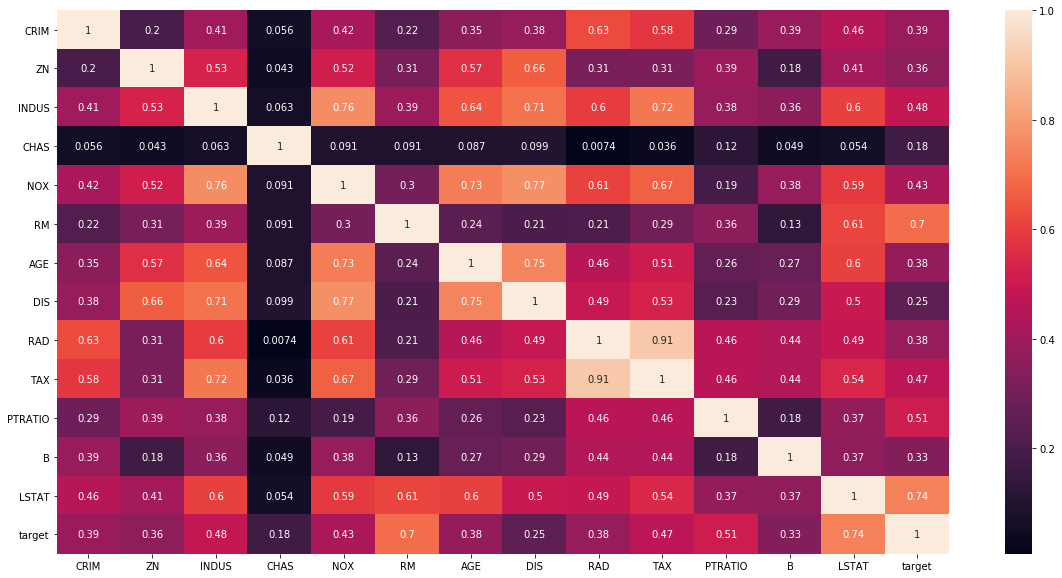

In [204]:
print('Correlation between features and target.')
cor = dataset.corr().abs()
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True)

In [205]:
print('Select features based upon correlation. Selection the ones with pretty strong correlation.')
attr = cor.columns[cor['target']>0.35]
data = pd.DataFrame(dataset[attr],columns=attr.tolist())
data.drop(['target'],axis=1,inplace=True)
print('Preview of new dataset.')
display(data.head())

Select features based upon correlation. Selection the ones with pretty strong correlation.
Preview of new dataset.


,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,3.0,222.0,18.7,5.33


Visualising box plot for target to find out amount of outliers.


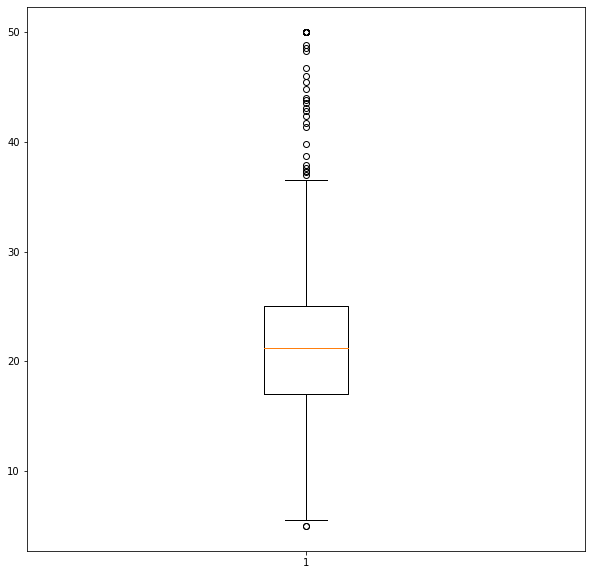

In [206]:
print('Visualising box plot for target to find out amount of outliers.')
plt.figure(figsize=(10,10))
plt.boxplot(target)
plt.show()

In [207]:
print('Getting rid of outliers using Inter-Quantile-Range.')
print(target.shape,data.shape)
index = []
quantile1,quantile3 = np.percentile(target,[25,75])
iqr = quantile3-quantile1
lb = quantile1 - (iqr*1.5)
ub = quantile3 + (iqr*1.5)
for i in range(len(target)):
    if (target[i]<lb or target[i]>ub):
        index.append(i)
        
target = np.delete(target,index)        
data.drop(index,inplace=True)
print('After getting rid of outliers shape of dataset is: ',data.shape)
print(target.shape,data.shape)

Getting rid of outliers using Inter-Quantile-Range.
(506,) (506, 10)
After getting rid of outliers shape of dataset is:  (466, 10)
(466,) (466, 10)


In [208]:
print('Spliting dataset into train and test.')

from sklearn.model_selection import train_test_split

train_data,test_data,train_labels,test_labels = train_test_split(data,target,test_size=0.2)

print('Train data size: ',train_data.shape,'\n','Train labels size:',train_labels.shape)
print('Test data size: ',test_data.shape,'\n','Test labels size:',test_labels.shape)

Spliting dataset into train and test.
Train data size:  (372, 10) 
 Train labels size: (372,)
Test data size:  (94, 10) 
 Test labels size: (94,)


In [209]:
print('Creating a pipeline for scaling the features and creating polynomial features.')

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

deg = 1
mypipeline = make_pipeline(StandardScaler(),PolynomialFeatures(degree=deg))


Creating a pipeline for scaling the features and creating polynomial features.


In [210]:
print('Trying out various models with various degree of polynomial functions.')
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

models = [LinearRegression(),Ridge(),DecisionTreeRegressor(),RandomForestRegressor(),SVR(kernel='rbf',gamma=0.1, C=1e3)]

score = np.empty((5,10))

for i in range(len(models)):
    model = models[i]
    print('*******************************')
    for j in range(10):
        deg = j+1
        temp = mypipeline.fit_transform(train_data)
        train_data_prep = pd.DataFrame(temp)
        scores = cross_val_score(model,train_data_prep,train_labels,cv=10,scoring='neg_mean_squared_error')
        score[i][j] = scores.mean()
        print(i,j+1,' ',scores.mean()*(-1))
else:
    print('Finished.')
   
ind = np.where(score == np.amax(score))
print('Min MSE: ',(np.amax(score))*(-1))
print('Index ',ind)

Trying out various models with various degree of polynomial functions.
*******************************
0 1   12.143672491983526
0 2   12.143672491983526
0 3   12.143672491983526
0 4   12.143672491983526
0 5   12.143672491983526
0 6   12.143672491983526
0 7   12.143672491983526
0 8   12.143672491983526
0 9   12.143672491983526
0 10   12.143672491983526
*******************************
1 1   12.133026980014943
1 2   12.133026980014943
1 3   12.133026980014943
1 4   12.133026980014943
1 5   12.133026980014943
1 6   12.133026980014943
1 7   12.133026980014943
1 8   12.133026980014943
1 9   12.133026980014943
1 10   12.133026980014943
*******************************
2 1   15.188394025604552
2 2   14.541081792318636
2 3   15.095191322901849
2 4   13.261450924608818
2 5   16.04208677098151
2 6   13.831091749644381
2 7   13.642200568990043
2 8   14.78849786628734
2 9   14.847090327169278
2 10   13.667047652916072
*******************************
3 1   7.149892387553342
3 2   7.1488180600995745
3

In [216]:
print('Selecting the most optimum model with optimal degree of polynomial using the above obtained MSE.')
ind = np.array(ind)
if ind[0] == 0:
    final_model = LinearRegression()   
elif ind[0] == 1: 
    final_model = Ridge()    
elif ind[0] == 2: 
    final_model = DecisionTreeRegressor()
elif ind[0] == 3: 
    final_model = RandomForestRegressor()    
else: 
    final_model = SVR(kernel='rbf',gamma=0.1,C=1e3);

deg = ind[1]

test_data_prep = mypipeline.fit_transform(test_data)
score = cross_val_score(final_model,test_data_prep,test_labels,cv=10,scoring='neg_mean_squared_error')



print('Test MSE: ',score.mean()*(-1))

Selecting the most optimum model with optimal degree of polynomial using the above obtained MSE.
Test MSE:  11.822740457777769
